In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Movielens rating dataset of size 100k


In [2]:
DATASET_LINK = 'http://files.grouplens.org/datasets/movielens/ml-100k.zip'

In [3]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip


In [4]:
full_details = pd.read_csv("ml-100k/u.info", header = None) # u info contains : number of users, items, ratings.

In [5]:
print("Deatils of the users, items and ratings in the dataset:" ,list(full_details[0]))

Deatils of the users, items and ratings in the dataset: ['943 users', '1682 items', '100000 ratings']


u data is the full dataset displayed above


In [6]:
# Renaming 
col_names = ['user id' , 'movie id', 'rating', 'timestamp']
dataset = pd.read_csv("ml-100k/u.data", sep = '\t', header = None , names = col_names)

In [7]:
dataset.head(10)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [8]:
print("Length of dataset: " , len(dataset))
max(dataset['movie id']), min(dataset['movie id'])

Length of dataset:  100000


(1682, 1)

u.item : info about the movies , it is a tab seperated list of <br>
movie id | movie title | release date | video release date |
IMDb URL | unknown | Action | Adventure | Animation |
Children's | Comedy | Crime | Documentary | Drama | Fantasy |
Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
Thriller | War | Western |


In [9]:
d = """movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western """
col_names2 = [col.strip() for col in d.split('|')]
col_names2

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [10]:
items_dataset = pd.read_csv("ml-100k/u.item", sep = '|', header = None, names = col_names2, encoding = 'latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
movie_dataset = items_dataset[['movie id', 'movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merging required Datasets


In [12]:
merged_dataset = pd.merge(dataset, movie_dataset, how = 'inner', on = 'movie id')
merged_dataset.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [13]:
merged_dataset.describe() #This shows that the dataset has no missing values.

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


## Data Visualization


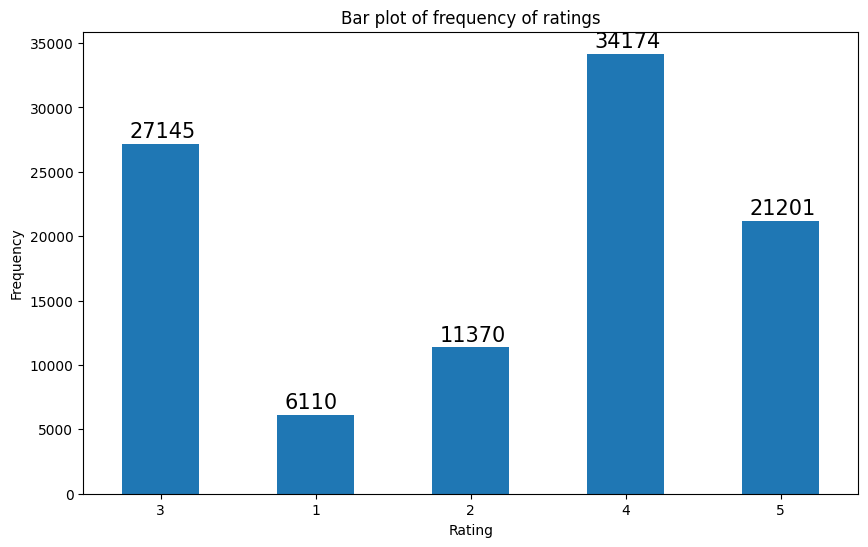

In [14]:
merged_dataset['rating'].value_counts(sort = False).plot(kind = 'bar', figsize = (10, 6), use_index=True, rot = 0)
plt.title("Bar plot of frequency of ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

label = list(merged_dataset['rating'].value_counts(sort = False))
r4 = [1,2,3,4,5]
for i in range(len(label)):
    plt.text(x = r4[i] -1.2 , y = label[i] + 500,s = label[i],size = 15)

In [15]:
avg_highly_rated_movies = merged_dataset.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()

In [16]:
avg_highly_rated_movies.head(10)

,rating
movie title,
Aiqing wansui (1994),5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
Entertaining Angels: The Dorothy Day Story (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Prefontaine (1997),5.0
"Great Day in Harlem, A (1994)",5.0
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0


In [17]:
print("Number of movies with 5 star rating: ", len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] == 5]))
print("Number of movies with above 4 star and below 5 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 4.0) & (avg_highly_rated_movies['rating'] < 5.0)]))
print("Number of movies with above 3 star and below 4 star rating on average: ", len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 3.0) & (avg_highly_rated_movies['rating'] < 4.0)]))
print("Number of movies with above 2 star and below 3 star rating on average: ", len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 2.0) & (avg_highly_rated_movies['rating'] < 3.0)]))
print("Number of movies with above 1 star and below 2 star rating on average: ", len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 1.0) & (avg_highly_rated_movies['rating'] < 2.0)]))
print("Number of movies with below 1 star rating on average: ", len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] < 1.0]))

Number of movies with 5 star rating:  10
Number of movies with above 4 star and below 5 star rating on average:  163
Number of movies with above 3 star and below 4 star rating on average:  871
Number of movies with above 2 star and below 3 star rating on average:  492
Number of movies with above 1 star and below 2 star rating on average:  128
Number of movies with below 1 star rating on average:  0


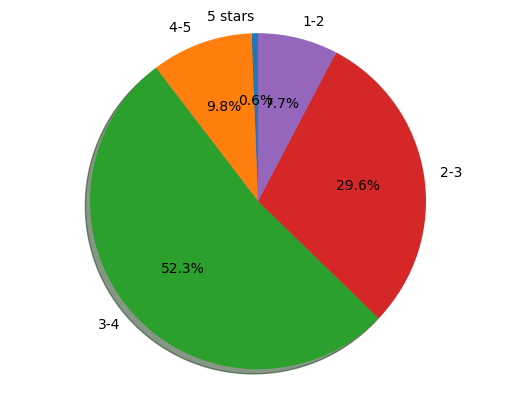

In [18]:
#Pie chart of ratings
labels = '5 stars', '4-5 ','3-4', '2-3', '1-2'
sizes = [10, 163, 871, 492, 128]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Recomendations for new users ( Content based & Popularity based Recommendation system)


In [19]:
avg_highly_rated_movies.reset_index(level=0, inplace=True)

In [20]:
avg_highly_rated_movies.columns = ['movie title', 'average rating']
avg_highly_rated_movies.head(10)

,movie title,average rating
0,Aiqing wansui (1994),5.0
1,Someone Else's America (1995),5.0
2,Star Kid (1997),5.0
3,Entertaining Angels: The Dorothy Day Story (1996),5.0
4,"Saint of Fort Washington, The (1993)",5.0
5,Prefontaine (1997),5.0
6,"Great Day in Harlem, A (1994)",5.0
7,They Made Me a Criminal (1939),5.0
8,Marlene Dietrich: Shadow and Light (1996),5.0
9,Santa with Muscles (1996),5.0


There are the top 10 movies that can be suggested to users with no History or **New Users**


In [21]:
merged_dataset.groupby(['movie title']).agg({"rating":"sum"})['rating'].sort_values(ascending=False)


movie title
Star Wars (1977)                          2541
Fargo (1996)                              2111
Return of the Jedi (1983)                 2032
Contact (1997)                            1936
Raiders of the Lost Ark (1981)            1786
                                          ... 
Promise, The (Versprechen, Das) (1994)       1
Further Gesture, A (1996)                    1
Wend Kuuni (God's Gift) (1982)               1
Yankee Zulu (1994)                           1
Woman in Question, The (1950)                1
Name: rating, Length: 1664, dtype: int64

Text(0, 0.5, 'Number of times a user watched that movie')

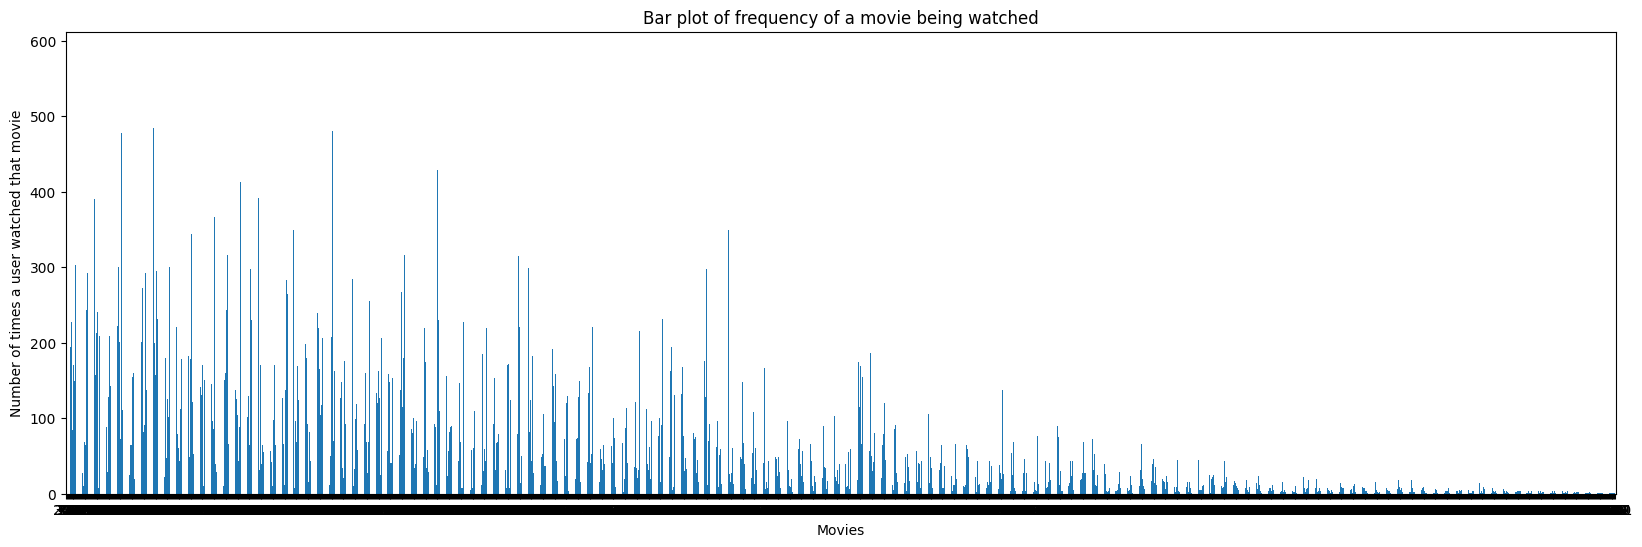

In [22]:

merged_dataset['movie id'].value_counts(sort=False).plot(kind='bar' ,figsize=(20,6), use_index = True, rot=0)
plt.title('Bar plot of frequency of a movie being watched')
plt.xlabel('Movies')
plt.ylabel('Number of times a user watched that movie')


In [23]:
popular_movies = merged_dataset.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)

In [24]:
popular_movies = popular_movies.to_frame()
popular_movies.reset_index(level=0, inplace=True)
popular_movies.columns = ['movie title', 'Number of Users watched']

In [25]:
print("Number of popular movies with more than 500 viewers: ",len(popular_movies[popular_movies['Number of Users watched'] >= 500]))
print("Number of popular movies with more than 400 and less than 500 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 400) & (popular_movies['Number of Users watched'] < 500)]))
print("Number of popular movies with more than 300 and less than 400 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 300) & (popular_movies['Number of Users watched'] < 400)]))
print("Number of popular movies with more than 200 and less than 300 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 200) & (popular_movies['Number of Users watched'] < 300)]))
print("Number of popular movies with more than 100 and less than 200 viewers: ",len(popular_movies[(popular_movies['Number of Users watched'] >= 100) & (popular_movies['Number of Users watched'] < 200)]))
print("Number of popular movies with less than 100 viewers: ", len(popular_movies[(popular_movies['Number of Users watched'] < 100)]))

Number of popular movies with more than 500 viewers:  4
Number of popular movies with more than 400 and less than 500 viewers:  8
Number of popular movies with more than 300 and less than 400 viewers:  22
Number of popular movies with more than 200 and less than 300 viewers:  84
Number of popular movies with more than 100 and less than 200 viewers:  220
Number of popular movies with less than 100 viewers:  1326


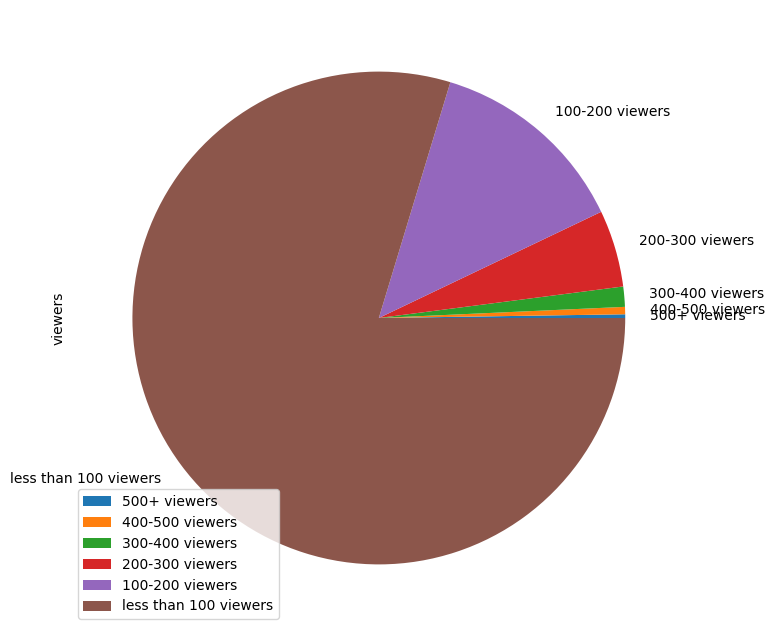

In [27]:
df = pd.DataFrame({'viewers': [4, 8, 22, 84, 220,1326]},
                  index = ['500+ viewers', '400-500 viewers', '300-400 viewers', 
                           '200-300 viewers', '100-200 viewers', 'less than 100 viewers'])
plot = df.plot.pie(y = 'viewers', figsize = (8,8))

In [30]:
popular_movies[popular_movies["Number of Users watched"] >= 400] #These are the popular movies which can be recommended to new users.

,movie title,Number of Users watched
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485
5,"English Patient, The (1996)",481
6,Scream (1996),478
7,Toy Story (1995),452
8,Air Force One (1997),431
9,Independence Day (ID4) (1996),429
